# <span style="color:gold">**Variograma**</span>
***

### **Editado por: Kevin Alexander Gómez**
#### Contacto: kevinalexandr19@gmail.com | [Linkedin](https://www.linkedin.com/in/kevin-alexander-g%C3%B3mez-2b0263111/) | [Github](https://github.com/kevinalexandr19)

Este tutorial está basado en el trabajo de [Michael Pyrcz](https://github.com/GeostatsGuy/PythonNumericalDemos).
***

### **Descripción**

En este tutorial, revisaremos el concepto de **variograma** y su aplicación en el análisis de datos espaciales, usando la librería `geostatspy`.

Es necesario haber llevado previamente los tutoriales de [Pandas](1c_pandas.ipynb) y [Matplotlib](1d_matplotlib.ipynb).

Este Notebook es parte del proyecto [**Python para Geólogos**](https://github.com/kevinalexandr19/manual-python-geologia), y ha sido creado con la finalidad de facilitar el aprendizaje en Python para estudiantes y profesionales en el campo de la Geología.

***

## **1. ¿Qué es la estacionariedad?**
***

Todo estudio estadístico requiere de una toma repetida de muestras (e.g. muestras de agua o aire en una estación de monitoreo).\
Sin embargo, <span style="color:lightgreen">en el subsuelo no podemos tomar muestras repetidas de un mismo lugar</span>.

En vez de hacer un análisis estadístico a través del tiempo, lo realizamos a través del <span style="color:lightgreen">espacio</span>, asumiendo lo siguiente:
- Las medidas estadísticas (e.g. media, varianza, etc.) son <span style="color:lightgreen">invariantes</span> a lo largo del área de interés.
- El área de interés está compuesto por <span style="color:lightgreen">el mismo tipo de material</span> (e.g. estratos de roca).

Esto se conoce como la <span style="color:gold">decisión de estacionariedad</span>.\
Es importante tener en cuenta que la estacionariedad depende en gran medida de la <span style="color:lightgreen">escala</span>.

### **1.1. ¿Continuidad espacial?**

La <span style="color:gold">continuidad espacial</span> representa la correlación que existe entre diferentes valores a lo largo del espacio (separados por una distancia).

Sin continuidad espacial, la correlación es nula y los valores serán aleatorios sin importar a que distancia se encuentren.\
Por el contrario, un espacio totalmente homogéneo tiene una continuidad espacial perfecta, pues todos sus valores se encuentran correlacionados.

## **2. Semivariograma**
***

Para cuantificar la continuidad espacial, tenemos que hacer uso del <span style="color:gold">semivariograma</span>, que es una <span style="color:lightgreen">función de la diferencia entre valores sobre la distancia</span>.\
Se calcula la mitad de la diferencia cuadrática media entre cada par de puntos dentro del área de interés, separados de acuerdo a un intervalo específico:

<center> $\Large \gamma_{x}(\normalsize h\Large)\,\,\, = \frac{1}{2N(h)} \sum^{N(h)}_{i=1}{(z(u_{i}) - z(u_{i} + h))^2} $ </center>

Donde:

- $h$ es el paso o distancia de separación entre puntos
- $\gamma_{x}(h)$ es la función semivariograma para una distancia h
- $N$ es el número total de pares de muestras usadas por cada distancia $h$
- $z$ es el valor de la variable asociada a la posición de las muestras
- $u_{i}$ es la posición del punto inicial

En la práctica, se usa el termino <span style="color:gold">variograma</span> para describir el semivariograma.

El variograma permite <span style="color:lightgreen">analizar el comportamiento espacial de una variable sobre un área definida</span>, obteniendo como resultado una figura experimental que refleja la distancia máxima de influencia de un punto sobre otro y también aplicado a diferentes distancias.

### **2.1. Covarianza**

La <span style="color:gold">covarianza</span> es una medida de la similitud vs. la distancia y también se calcula para diferentes distancias $h$.\
EL variograma se puede relacionar directamente con la covarianza:


<center> $\Large C_{x}(\normalsize h\Large)\,\, = \sigma^{2}_{x} - \gamma_{x}(\normalsize h\Large)\,\,$ </center>
<font size="2" color="gold"><center> $covarianza \,\,\,\,\,\, varianza \,\,\,\,\, variograma$ </center></font>


Donde:
- $h$ es el paso o distancia de separación entre puntos
- $C_{x}(h)$ es la covarianza entre muestras separadas por una distancia $h$
- $\sigma^{2}_{x}$ es la varianza de la variable
- $\gamma_{x}(h)$ es el variograma para una distancia $h$

Si se usa una varianza estandarizada i.e. $\sigma^{2}_{x}=1$, entonces:

<center> $\Large C_{x}(\normalsize h\Large)\,\,\, = 1 - \gamma_{x}(\normalsize h\Large)\,\,$ </center>
<font size="2" color="gold"><center> $covarianza \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, variograma$ </center></font>
<font size="2" color="gold"><center> $estandarizada \,\,\,\,\,\,\,\,\,\,\,\,\,\, estandarizado$ </center></font>

### **2.2. Sill, rango y efecto pepita**

El valor a partir del cual el gráfico del variograma comienza a "aplanarse" es conocido como <span style="color:gold">sill</span> o <span style="color:gold">meseta</span>.\
Es necesario graficar el sill para conocer el grado de correlación en el variograma.

La distancia $h$ a partir de la cual el variograma alcanza el valor del sill se conoce como <span style="color:gold">rango</span> o <span style="color:gold">alcance</span>.\
Más allá de esta distancia, los puntos dejan de tener correlación espacial.

<center> $\Large C_{x}(\normalsize h=rango\Large)\,\,\, = \sigma^{2}_{x} - \gamma_{x}(\normalsize h=rango\Large)\,\, = 0$ </center>
<font size="2" color="gold"><center> $covarianza \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, varianza \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, sill \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, $ </center></font>

<br>

El valor del variograma para $h = 0$ tiende a ser positivo debido al Error Fundamental (FSE) y también es conocido como <span style="color:gold">efecto pepita</span>.

<center> $\Large C_{x}(\normalsize h=0\Large)\,\,\, = C_{0} = \gamma_{x}(\normalsize h=0\Large)\,\,$ </center>
<font size="2" color="gold"><center> $efecto\,pepita \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, $ </center></font>


### **2.3. Correlograma**
El <span style="color:gold">correlograma</span> es una alternativa al variograma tradicional que muestra la correlación entre puntos separados por una distancia $h$.\
La correlación suele disminuir conforme aumenta la distancia hasta llegar a cero.\
La relación entre la covarianza y el correlograma es el siguiente:

<center> $\Large \rho_{x}(\normalsize h\Large)\,\,\, = \frac{C_{x}(h)}{\sigma^{2}_{x}}$ </center>

Donde:
- $\rho_{x}(h)$ es la función correlograma
- $h$ es el paso o distancia de separación entre puntos
- $C_{x}(h)$ es la covarianza
- $\sigma^{2}_{x}$ es la varianza

Si se usa una varianza estandarizada $\sigma^{2}_{x}=1$, entonces:

<center> $\Large \rho_{x}(\normalsize h\Large)\,\,\, = 1 - \gamma_{x}(\normalsize h\Large)$ </center>


## **3. Ejemplo de variograma usando `geostatspy`**
***
### **3.1. Procesamiento de datos**
Importamos las librerías:

In [1]:
import geostatspy.GSLIB as GSLIB
import geostatspy.geostats as geostats

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Y cargamos el archivo `data_variograma.csv`:

In [2]:
data = pd.read_csv("files/data_variograma.csv")

In [3]:
data.head()

,X,Y,Facies,Porosidad,Permeabilidad
0,100.0,900.0,arenisca,0.100187,1.363890
1,100.0,800.0,lutita,0.107947,12.576845
2,100.0,700.0,lutita,0.085357,5.984520
3,100.0,600.0,lutita,0.108460,2.446678
4,100.0,500.0,lutita,0.102468,1.952264


Revisamos la información:

In [4]:
# Resumen estadístico general
data.describe().T

,count,mean,std,min,25%,50%,75%,max
X,261.0,629.823755,341.200403,40.000000,241.000000,700.000000,955.000000,1005.000000
Y,261.0,488.344828,166.669352,29.000000,416.000000,479.000000,539.000000,989.000000
Porosidad,261.0,0.150357,0.049783,0.058871,0.104893,0.137062,0.199108,0.242298
Permeabilidad,261.0,183.711554,344.959449,0.033611,2.186525,19.977020,246.215865,2642.999829


In [5]:
# Tipos de datos en las columnas
data.dtypes

X                float64
Y                float64
Facies            object
Porosidad        float64
Permeabilidad    float64
dtype: object

In [6]:
# Elementos únicos en la columna Facies
data["Facies"].unique()

array(['arenisca', 'lutita'], dtype=object)

En resumen, tenemos las siguientes columnas:
- `X`, `Y` : coordenadas
- `Facies` : arenisca y lutita
- `Porosidad` : porosidad en fracción (%)
- `Permeabilidad` : permeabilidad en mDarcy

Ahora, separeremos la información en dos DataFrames de acuerdo al tipo de Facies:

In [7]:
arenisca = data[data["Facies"] == "arenisca"].copy()
lutita = data[data["Facies"] == "lutita"].copy()

Y usamos `describe` para obtener un resumen estadístico por cada Facies:

In [8]:
arenisca.describe().T

,count,mean,std,min,25%,50%,75%,max
X,162.0,831.111111,238.857269,50.000000,800.000000,945.000000,975.000000,1005.000000
Y,162.0,526.987654,142.707797,100.000000,469.000000,509.000000,549.000000,939.000000
Porosidad,162.0,0.181001,0.037196,0.083842,0.155735,0.194823,0.207754,0.242298
Permeabilidad,162.0,293.798999,399.989890,0.381032,31.996547,155.888123,385.177730,2642.999829


In [9]:
lutita.describe().T

,count,mean,std,min,25%,50%,75%,max
X,99.0,300.444444,196.365820,40.000000,201.000000,231.000000,300.000000,970.000000
Y,99.0,425.111111,183.665784,29.000000,376.000000,416.000000,456.000000,989.000000
Porosidad,99.0,0.100212,0.014483,0.058871,0.091902,0.101987,0.109846,0.141657
Permeabilidad,99.0,3.568463,6.782476,0.033611,0.723788,1.530878,3.743835,52.500870


Podemos notar que las Facies presentan diferencias significativas, por lo cual deben analizadas por separado.

### **3.2. Transformación de datos**

Antes de crear variogramas usando la información, debemos realizar una transformación de los variables de Porosidad y Permeabilidad para que se asemejen a una distribución normal.\
Esta transformación tiene las siguientes finalidades:
- Elimina la dependencia de las variables con respecto a sus unidades de medida
- Al tener una distribución normal, pueden ser usados en Simulación Secuencial Gaussiana
- Ayuda en el tratamiento de outliers
- Facilita la interpretación del variograma

Para hacer la transformación, usaremos la función `nscore` del módulo `geostatspy`:

In [10]:
geostats.nscore

<function geostatspy.geostats.nscore(df, vcol, wcol=None, ismooth=False, dfsmooth=None, smcol=0, smwcol=0)>

La función tiene los siguientes parámetros principales:
- `df`: el DataFrame con la información
- `vcol`: la columna de la variable que se va a transformar
- `wcol`: lista de ponderaciones en caso sea necesario aplicar declustering

La función devuelve tres resultados:
- Un DataFrame con la variable transformada
- Un arreglo de Numpy con los valores originales de la variable
- Un arreglo de Numpy con los pesos utilizados para transformar los valores originales

Aplicando la función para cada cada tipo de facies y para cada tipo:

In [11]:
# nscore para el DataFrame general con todas las facies
data["NPor"] = geostats.nscore(data, "Porosidad")[0]
data["NPerm"] = geostats.nscore(data, "Permeabilidad")[0]

# nscore para las facies de arenisca
arenisca["NPor"] = geostats.nscore(arenisca, "Porosidad")[0]
arenisca["NPerm"] = geostats.nscore(arenisca, "Permeabilidad")[0]

# nscore para las facies de lutita
lutita["NPor"] = geostats.nscore(lutita, "Porosidad")[0]
lutita["NPerm"] = geostats.nscore(lutita, "Permeabilidad")[0]

Y ahora observamos los datos transformados:

In [12]:
data.head()

,X,Y,Facies,Porosidad,Permeabilidad,NPor,NPerm
0,100.0,900.0,arenisca,0.100187,1.363890,-0.907799,-0.893392
1,100.0,800.0,lutita,0.107947,12.576845,-0.566754,-0.144561
2,100.0,700.0,lutita,0.085357,5.984520,-1.498129,-0.322431
3,100.0,600.0,lutita,0.108460,2.446678,-0.522198,-0.624092
4,100.0,500.0,lutita,0.102468,1.952264,-0.810549,-0.758293


In [13]:
arenisca.head()

,X,Y,Facies,Porosidad,Permeabilidad,NPor,NPerm
0,100.0,900.0,arenisca,0.100187,1.363890,-2.158819,-2.158819
8,100.0,100.0,arenisca,0.137453,5.727603,-0.817609,-1.468475
9,200.0,900.0,arenisca,0.137062,14.771314,-0.839418,-0.955141
10,200.0,800.0,arenisca,0.125984,10.675436,-1.031153,-1.237102
18,300.0,900.0,arenisca,0.111516,27.999817,-1.621370,-0.694044


In [14]:
lutita.head()

,X,Y,Facies,Porosidad,Permeabilidad,NPor,NPerm
1,100.0,800.0,lutita,0.107947,12.576845,0.501298,1.807354
2,100.0,700.0,lutita,0.085357,5.984520,-0.967422,1.051717
3,100.0,600.0,lutita,0.108460,2.446678,0.589456,0.389414
4,100.0,500.0,lutita,0.102468,1.952264,0.050661,0.152506
5,100.0,400.0,lutita,0.110579,3.691908,0.781781,0.650837


Ahora, graficaremos las distribuciones de porosidad y permeabilidad para ambas Facies:

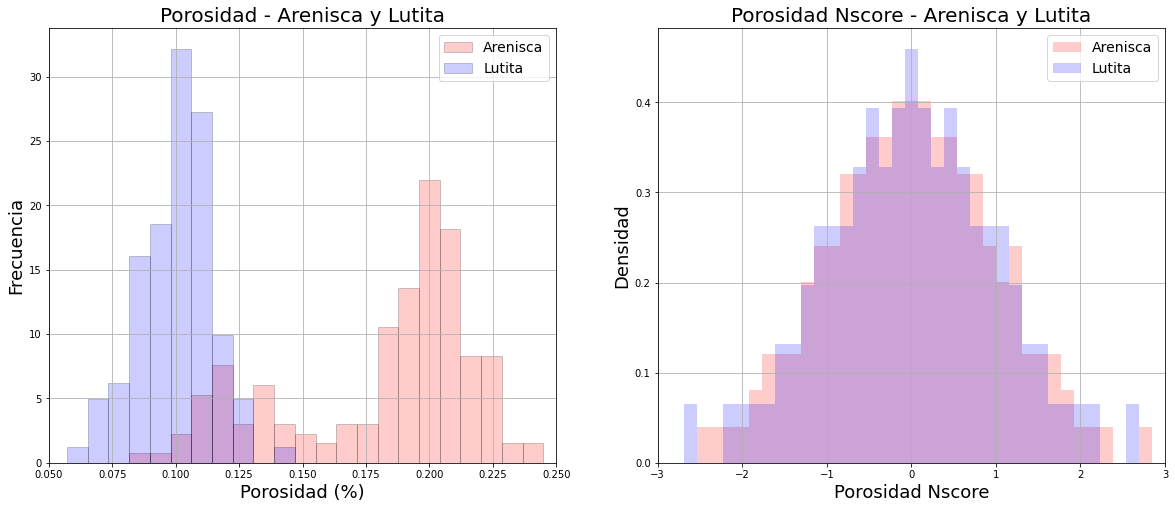

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Gráfico sin transformar
axs[0].hist(data=arenisca, x="Porosidad", bins=np.linspace(0, 0.4, 50), density=True, alpha=0.2, color="red", label="Arenisca", edgecolor="black")
axs[0].hist(data=lutita, x="Porosidad", bins=np.linspace(0, 0.4, 50), density=True, alpha=0.2, color="blue", label="Lutita", edgecolor="black")
axs[0].set_xlim(0.05, 0.25)
axs[0].set_title("Porosidad - Arenisca y Lutita", fontsize=20)
axs[0].set_xlabel("Porosidad (%)", fontsize=18)
axs[0].set_ylabel("Frecuencia", fontsize=18)
axs[0].legend(fontsize=14)
axs[0].grid()

# Gráfico nscore
axs[1].hist(data=arenisca, x="NPor", bins=np.linspace(-3, 3, 40), density=True, alpha=0.2, color="red", label="Arenisca")
axs[1].hist(data=lutita, x="NPor", bins=np.linspace(-3, 3, 40), density=True, alpha=0.2, color="blue", label="Lutita")
axs[1].set_xlim(-3, 3)
axs[1].set_title("Porosidad Nscore - Arenisca y Lutita", fontsize=20)
axs[1].set_xlabel("Porosidad Nscore", fontsize=18)
axs[1].set_ylabel("Densidad", fontsize=18)
axs[1].legend(fontsize=14)
axs[1].grid()

plt.show()

Observamos que la función `nscore` realizó una transformación correcta de los valores de Porosidad de ambas Facies a una distribución normal.

### **3.3. Cálculo del variograma**
Empezaremos graficando la distribución espacial de los valores de Porosidad y Permeabilidad usando la función `locmap_st`:

In [16]:
GSLIB.locmap_st

<function geostatspy.GSLIB.locmap_st(df, xcol, ycol, vcol, xmin, xmax, ymin, ymax, vmin, vmax, title, xlabel, ylabel, vlabel, cmap)>

La función `locmap_st` utiliza los siguientes parámetros:
- `df`: el DataFrame con la información
- `xcol`, `ycol`, `vcol`: nombre de las columnas para las coordenadas X, Y y la variable de interés
- `xmin`, `xmax`, `ymin`, `ymax`, `vmin`, `vmax`: valores mínimos y máximos para las coordenadas X, Y y la variable de interés
- `title`: título de la figura
- `xlabel`, `ylabel`: nombre de los ejes X e Y
- `vlabel`: nombre de la variable de interés
- `cmap`: mapa de colores para la figura

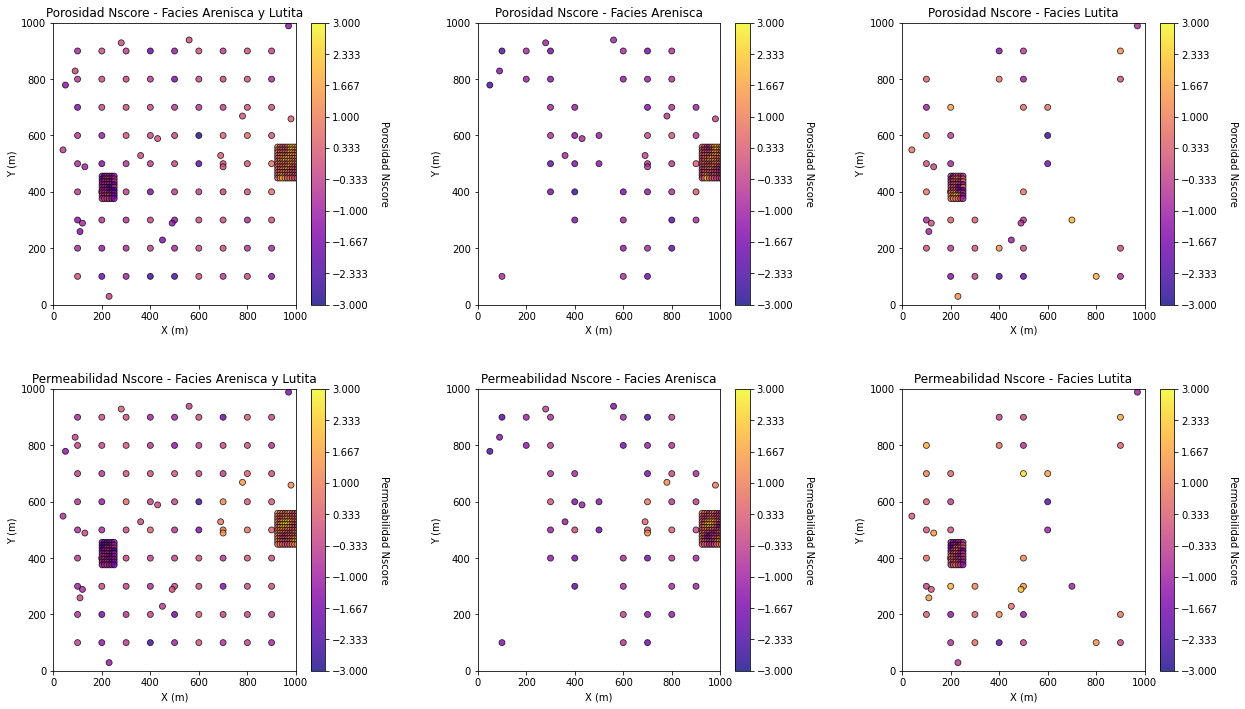

In [17]:
# Mapa de color
cmap = plt.cm.plasma

# Figura
plt.figure(figsize=(8, 5))

plt.subplot(231)
GSLIB.locmap_st(data, "X", "Y", "NPor", 0, 1000, 0, 1000, -3, 3, "Porosidad Nscore - Facies Arenisca y Lutita", "X (m)", "Y (m)", "Porosidad Nscore", cmap)

plt.subplot(232)
GSLIB.locmap_st(arenisca, "X", "Y", "NPor", 0, 1000, 0, 1000, -3, 3, "Porosidad Nscore - Facies Arenisca", "X (m)", "Y (m)", "Porosidad Nscore", cmap)

plt.subplot(233)
GSLIB.locmap_st(lutita, "X", "Y", "NPor", 0, 1000, 0, 1000, -3, 3, "Porosidad Nscore - Facies Lutita", "X (m)", "Y (m)", "Porosidad Nscore", cmap)

plt.subplot(234)
GSLIB.locmap_st(data, "X", "Y", "NPerm", 0, 1000, 0, 1000, -3, 3, "Permeabilidad Nscore - Facies Arenisca y Lutita", "X (m)", "Y (m)", "Permeabilidad Nscore", cmap)

plt.subplot(235)
GSLIB.locmap_st(arenisca, "X", "Y", "NPerm", 0, 1000, 0, 1000, -3, 3, "Permeabilidad Nscore - Facies Arenisca", "X (m)", "Y (m)", "Permeabilidad Nscore", cmap)

plt.subplot(236)
GSLIB.locmap_st(lutita, "X", "Y", "NPerm", 0, 1000, 0, 1000, -3, 3, "Permeabilidad Nscore - Facies Lutita", "X (m)", "Y (m)", "Permeabilidad Nscore", cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.8, wspace=0.4, hspace=0.3)
plt.show()

Notamos que existen dos zonas con una mayor densidad de datos, sin embargo estas solo representan una fracción del área total, en este tutorial nos centraremos en calcular el variograma para distancias de 100 metros.

También podemos observar que el espaciamiento entre las muestras es de aproximadamente 100 metros, el espacio total es de 1000 metros así que usaremos una extensión aproximada de 700 metros equivalente a 14 distancias de separación de 50 metros.

Ahora, usaremos la función `gamv` del programa de cálculo de variograma experimental:

In [18]:
geostats.gamv

<function geostatspy.geostats.gamv(df, xcol, ycol, vcol, tmin, tmax, xlag, xltol, nlag, azm, atol, bandwh, isill)>

La función `gamv` contiene los siguientes parámetros:
- `df`: el DataFrame con la información
- `xcol`, `ycol`, `vcol`: nombre de las columnas para las coordenadas X, Y y la variable de interés
- `tmin`, `tmax`: valores mínimos y máximos de la variable de interés (en caso sea necesario filtrar)
- `xlag`: paso o distancia de separación entre puntos
- `xltol`: tolerancia de separación entre puntos
- `nlag`: número de pasos
- `azm`: azimut o dirección del variograma
- `atol`: tolerancia de azimut
- `bandwh`: ancho de banda horizontal dentro del cual se consideran válidos los datos para el cálculo del variograma
- `isill`: colocamos el valor de 1 para estandarizar el sill

Y devuelve los siguientes resultados:
- La coordenada de cada punto del variograma.
- El valor del variograma para cada punto.
- El número de pares utilizados para el cálculo del variograma en cada punto.

El cálculo del variograma será isotrópico, es decir, su valor no será sensitivo a la dirección del variograma.

In [58]:
# Sin valores mínimos y máximos para la variable
tmin, tmax = -9999, 9999
# Separación de 50 +- 50 metros y 14 intervalos
lag_dist, lag_tol, nlag = 50, 50, 14
# Dirección norte y ancho de banda sin límite
azm, atol, bandwh = 0, 90, 9999
# Variograma estandarizado
isill = 1

In [59]:
# Variogramas de porosidad
# Arenisca
lag, por_ar_gamma, por_ar_npair = geostats.gamv(arenisca, "X", "Y", "NPor", tmin, tmax, lag_dist, lag_tol, nlag, azm, atol, bandwh, isill)
# Lutita
lag, por_lt_gamma, por_lt_npair = geostats.gamv(lutita, "X", "Y", "NPor", tmin, tmax, lag_dist, lag_tol, nlag, azm, atol, bandwh, isill)
# Total
lag, por_gamma, por_npair = geostats.gamv(data, "X", "Y", "NPor", tmin, tmax, lag_dist, lag_tol, nlag, azm, atol, bandwh, isill)

# Variogramas de permeabilidad
# Arenisca
lag, perm_ar_gamma, perm_ar_npair = geostats.gamv(arenisca, "X", "Y", "NPerm", tmin, tmax, lag_dist, lag_tol, nlag, azm,atol, bandwh, isill)
# Lutita
lag, perm_lt_gamma, perm_lt_npair = geostats.gamv(lutita, "X", "Y", "NPerm", tmin, tmax, lag_dist, lag_tol, nlag, azm, atol, bandwh, isill)
# Total
lag, perm_gamma, perm_npair = geostats.gamv(data, "X", "Y", "NPerm", tmin, tmax, lag_dist, lag_tol, nlag, azm, atol, bandwh, isill)

Ahora, graficaremos los variogramas:

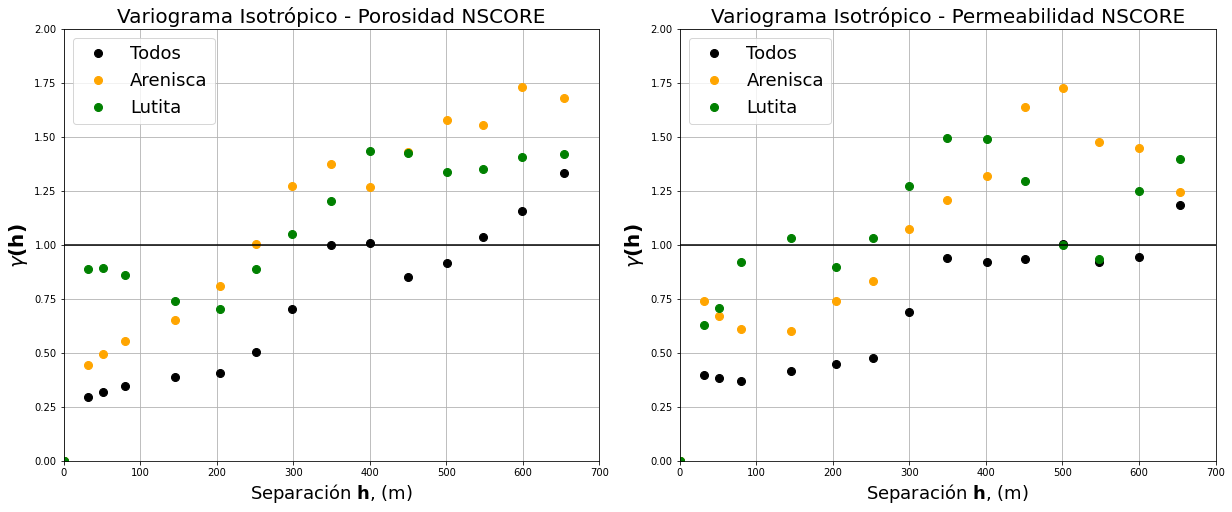

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))

# Variograma de la porosidad
ax1.plot(lag, por_gamma, ".", color="black", label="Todos", markersize=16)
ax1.plot(lag, por_ar_gamma, ".", color="orange", label="Arenisca", markersize=16)
ax1.plot(lag, por_lt_gamma, ".", color="green", label="Lutita", markersize=16)
ax1.plot([0, 2000], [1., 1.], color="black")

ax1.set_xlabel(r"Separación $\bfh$, (m)", fontsize=18)
ax1.set_ylabel(r"$\gamma\bf(h)$", fontsize=20)
ax1.set_title("Variograma Isotrópico - Porosidad NSCORE", fontsize=20)
ax1.set_xlim([0, 700])
ax1.set_ylim([0, 2.])
ax1.legend(loc="upper left", fontsize=18)
ax1.grid(True)

# Variograma de la permeabilidad
ax2.plot(lag, perm_gamma, ".", color="black", label="Todos", markersize=16)
ax2.plot(lag, perm_ar_gamma, ".", color="orange", label="Arenisca", markersize=16)
ax2.plot(lag, perm_lt_gamma, ".", color="green", label="Lutita", markersize=16)
ax2.plot([0, 2000], [1., 1.], color = 'black')

ax2.set_xlabel(r"Separación $\bfh$, (m)", fontsize=18)
ax2.set_ylabel(r"$\gamma\bf(h)$", fontsize=20)
ax2.set_title("Variograma Isotrópico - Permeabilidad NSCORE", fontsize=20)
ax2.set_xlim([0, 700])
ax2.set_ylim([0, 2.])
ax2.legend(loc="upper left", fontsize=18)
ax2.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.15, hspace=0.3)
plt.show()

En resumen, podemos notar que:
- El rango de la arenisca es mayor que el de la lutita tanto para porosidad como para permeabilidad.
- El variograma de la lutita presenta mayor ruido y esto puede deberse a que sus puntos se encuentran más alejados.
- La continuidad espacial de la arenisca es mayor que el de la lutita.
***